In [1]:
from sympy import symbols, init_printing
init_printing()
from celmech.andoyer import Andoyer
import numpy as np

In [2]:
G = 4*np.pi**2
masses = [1., 1.e-5, 1.e-6]
Phi_equil = 10
j = 7
k = 2
a10 = 1.

Hsim = Andoyer.from_elements(j, k, Phi_equil, 0, a10, G, masses)
sim = Hsim.to_sim()

In [3]:
ps = sim.particles

B0 = Hsim.Brouwer
W0 = Hsim.W

Norbits = 3000
Nout = 1000
tmax = Norbits*sim.particles[1].P
times = np.linspace(0, tmax, Nout)
timescale = Hsim.params['timescale']
symtimes = times/abs(timescale)

Nsol = np.zeros((2, Nout))
symsol = np.zeros((2, Nout))
pratio, BrouwerErr, WErr, Ks = np.zeros(Nout), np.zeros(Nout), np.zeros(Nout), np.zeros(Nout)
Ws, ws = np.zeros(Nout), np.zeros(Nout)

for i, time in enumerate(times):
    pratio[i] = ps[2].P/ps[1].P
    andvars = Andoyer.from_Simulation(sim, j, k, a10)
    BrouwerErr[i] = abs((andvars.Brouwer-B0)/B0)
    WErr[i] = abs((andvars.W-W0)/W0)
    Ks[i] = andvars.K
    Ws[i] = andvars.W
    ws[i] = andvars.w

    symsol[:,i] = [Hsim.Phi, Hsim.phi]
    Nsol[:,i] = [andvars.Phi, andvars.phi]

    sim.integrate(np.sign(timescale)*time)    
    Hsim.integrate(symtimes[i])

/Users/dtamayo/miniconda2/envs/p3/lib/python3.5/site-packages/ipykernel/__main__.py:22: RuntimeWarning: divide by zero encountered in double_scalars


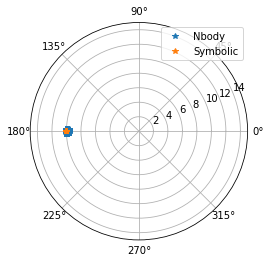

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

ax = plt.subplot('111', projection='polar')
ax.plot(Nsol[1,:], Nsol[0,:], '*', label='Nbody')
ax.plot(symsol[1,:], symsol[0,:], '*', label='Symbolic')
ax.set_rlim(0,15)
ax.legend()

In [5]:
def wrap(val):
    while val < -np.pi:
        val += 2*np.pi
    while val > np.pi:
        val -= 2*np.pi
    return val

npwrap = np.vectorize(wrap)

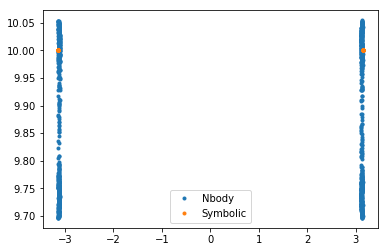

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(npwrap(Nsol[1,:]), Nsol[0,:], '.', label='Nbody')
ax.plot(npwrap(symsol[1,:]), symsol[0,:], '.', label='Symbolic')
ax.legend()